In [1]:
'''Used SVM to build and train a model using human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state).

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized,
 even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). 
 A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.


In [107]:
#importing the library
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [48]:
cell=pd.read_csv('/content/CancerDataSet_SVM.csv')  #reading the data 
cell

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [49]:
cell.info  #for the information of the data

<bound method DataFrame.info of           ID  Clump  UnifSize  UnifShape  ...  BlandChrom  NormNucl Mit  Class
0    1000025      5         1          1  ...           3         1   1      2
1    1002945      5         4          4  ...           3         2   1      2
2    1015425      3         1          1  ...           3         1   1      2
3    1016277      6         8          8  ...           3         7   1      2
4    1017023      4         1          1  ...           3         1   1      2
..       ...    ...       ...        ...  ...         ...       ...  ..    ...
694   776715      3         1          1  ...           1         1   1      2
695   841769      2         1          1  ...           1         1   1      2
696   888820      5        10         10  ...           8        10   2      4
697   897471      4         8          6  ...          10         6   1      4
698   897471      4         8          8  ...          10         4   1      4

[699 rows x 11 colu

In [50]:
cell.head()  

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [108]:
cell.describe

<bound method NDFrame.describe of           ID  Clump  UnifSize  UnifShape  ...  BlandChrom  NormNucl  Mit  Class
0    1000025      5         1          1  ...           3         1    1      2
1    1002945      5         4          4  ...           3         2    1      2
2    1015425      3         1          1  ...           3         1    1      2
3    1016277      6         8          8  ...           3         7    1      2
4    1017023      4         1          1  ...           3         1    1      2
..       ...    ...       ...        ...  ...         ...       ...  ...    ...
694   776715      3         1          1  ...           1         1    1      2
695   841769      2         1          1  ...           1         1    1      2
696   888820      5        10         10  ...           8        10    2      4
697   897471      4         8          6  ...          10         6    1      4
698   897471      4         8          8  ...          10         4    1      4

[683 

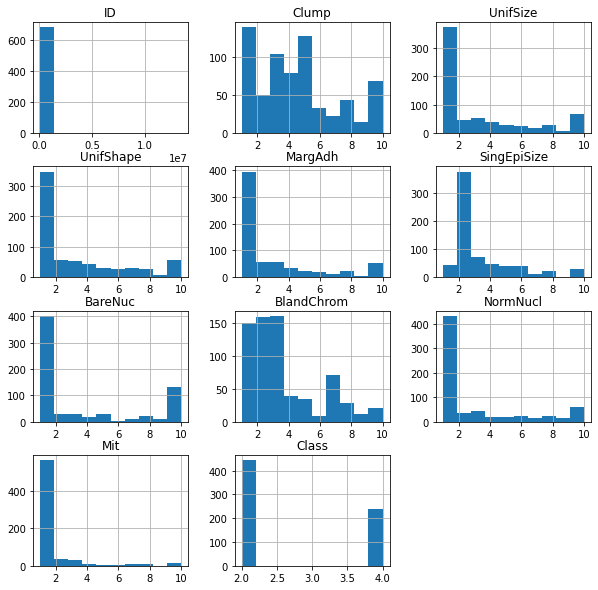

In [109]:
#For the visualization of the data 
cell.hist(figsize=(10,10))
plt.show()

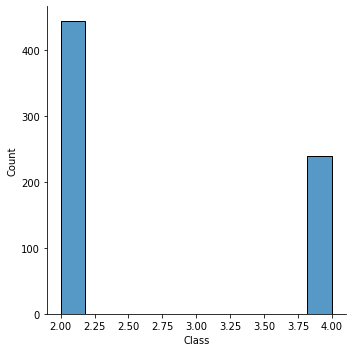

In [110]:
sns.displot(cell["Class"])

In [51]:
cell['Class'].value_counts()  #How many there are Malignant & Benign 

2    458
4    241
Name: Class, dtype: int64

In [52]:
#For the distribution of the Classes
malignant=cell[cell['Class']==4][0:200]
benign=cell[cell['Class']==2][0:200]

In [53]:
#help(malignant.plot)


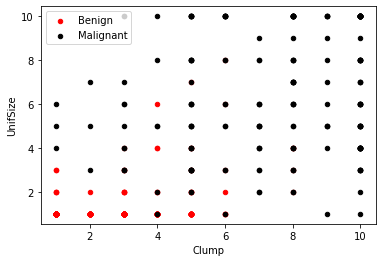

In [54]:
#both benign and malignant are dotted here
axes=benign.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Benign')
malignant.plot(kind='scatter',x='Clump',y='UnifSize',color='Black',label='Malignant',ax=axes)

In [57]:
#identifying the unwanted rows
cell.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [63]:
cell=cell[pd.to_numeric(cell['BareNuc'],errors='coerce').notnull()]
cell['BareNuc']=cell['BareNuc'].astype('int')
cell.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [77]:
#remove unwanted columns
cell.columns
feature= cell[['ID','Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit','Class']]
X=np.asarray(feature)
y=np.asarray(cell['Class'])
X[0:5]
#y[0:5]


array([[1000025,       5,       1,       1,       1,       2,       1,
              3,       1,       1,       2],
       [1002945,       5,       4,       4,       5,       7,      10,
              3,       2,       1,       2],
       [1015425,       3,       1,       1,       1,       2,       2,
              3,       1,       1,       2],
       [1016277,       6,       8,       8,       1,       3,       4,
              3,       7,       1,       2],
       [1017023,       4,       1,       1,       3,       2,       1,
              3,       1,       1,       2]])

In [83]:
#Diving the entire data as Train/Test part
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=4) 

In [86]:
X_train.shape
#y_train.shape

(546, 11)

In [87]:
x_test.shape
#y_train.shape

(137, 11)

In [101]:
#Modeling SVM with scikit_learn
from sklearn import svm
model=svm.SVC(kernel='linear',gamma='auto',C=2)
model.fit(X_train,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [104]:
y_predict = model.predict(x_test)

In [105]:
#evalutioin or Results
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.68      0.99      0.81        90
           4       0.83      0.11      0.19        47

    accuracy                           0.69       137
   macro avg       0.76      0.55      0.50       137
weighted avg       0.73      0.69      0.59       137

